# **Problem Statement:** Car Price Predictio Using Machine Learning

## **Description:**

* **Car price prediction is a common application of machine learning. The goal is to predict the price of a car based on a set of features, such as the make, model, year, mileage, and condition.**

* There are a number of different machine learning algorithms that can be used for car price prediction. Some of the most common algorithms include:

* **Linear regression:** Linear regression is a simple but effective algorithm that can be used to predict a continuous value, such as the price of a car.
Logistic regression: Logistic regression is a more complex algorithm that can be used to predict a binary value, such as whether a car will be sold or not.
* **Decision trees:** Decision trees are a powerful algorithm that can be used to predict a value based on a set of rules.
* **Random forests:** Random forests are a type of ensemble model that combines multiple decision trees to improve the accuracy of predictions.
The best algorithm for car price prediction will depend on the specific data set that is being used. In general, linear regression is a good starting point, but more complex algorithms may be necessary if the data set is large or complex.

* **Once an algorithm has been chosen, the next step is to train the model on a set of data. The training data should include features that are relevant to the price of the car, such as the make, model, year, mileage, and condition.**

* Once the model has been trained, it can be used to predict the price of new cars. The accuracy of the predictions will depend on the quality of the training data.

* Here are the steps involved in car price prediction using machine learning:

1. Collect data on cars, including features such as make, model, year, mileage, and condition.
2. Split the data into a training set and a test set.
3. Train a machine learning model on the training set.
4. Use the model to predict the prices of the cars in the test set.
5. Evaluate the accuracy of the predictions.
6. Use the model to predict the prices of new cars.

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials
from sklearn.metrics import mean_squared_error,mean_absolute_error
%matplotlib inline

# 2. The Datasets

In [2]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


* Here are the explanations of the features in the car dataset:

* **Car_Name:** The name of the car.
* **Year:** The year the car was manufactured.
* **Selling_Price:** The price at which the car is being sold.
* **Present_Price:** The current market value of the car.
* **Kms_Driven:** The number of kilometers the car has been driven.
* **Fuel_Type:** The type of fuel the car uses.
* **Seller_Type:** The type of seller, such as a private individual or a car dealer.
* **Transmission:** The type of transmission the car has, such as manual or automatic.
Owner: The number of previous owners the car has had.

In [3]:
df.dtypes[df.dtypes == object]

Car_Name        object
Fuel_Type       object
Seller_Type     object
Transmission    object
dtype: object

In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
for col in df.dtypes[df.dtypes == object].index:
    print('Unique items in column',col,'are:',df[col].unique())
    print('-'*75)

Unique items in column Car_Name are: ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'B

In [7]:
for col in df[['Fuel_Type','Seller_Type','Transmission']]:
    print(df[col].value_counts())
    print('-'*75)

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
---------------------------------------------------------------------------
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
---------------------------------------------------------------------------
Manual       261
Automatic     40
Name: Transmission, dtype: int64
---------------------------------------------------------------------------


In [8]:
df['Owner'].unique()

array([0, 1, 3])

In [9]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
df.drop(['Car_Name'],axis = 1,inplace = True)

In [11]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
df['Current_Year'] = 2021

In [13]:
df['Number_Of_Years'] = df['Current_Year'] - df['Year']

In [14]:
df.drop(['Year','Current_Year'],axis = 1,inplace = True)

In [15]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_Of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [16]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [17]:
def Encode(df,variable):
    encoded_Variable = df[variable].value_counts().to_dict()
    df[variable] = df[variable].map(encoded_Variable)

In [18]:
for col in df[['Fuel_Type','Seller_Type','Transmission']]:
    Encode(df,col)

In [19]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_Of_Years
0,3.35,5.59,27000,239,195,261,0,7
1,4.75,9.54,43000,60,195,261,0,8
2,7.25,9.85,6900,239,195,261,0,4
3,2.85,4.15,5200,239,195,261,0,10
4,4.60,6.87,42450,60,195,261,0,7


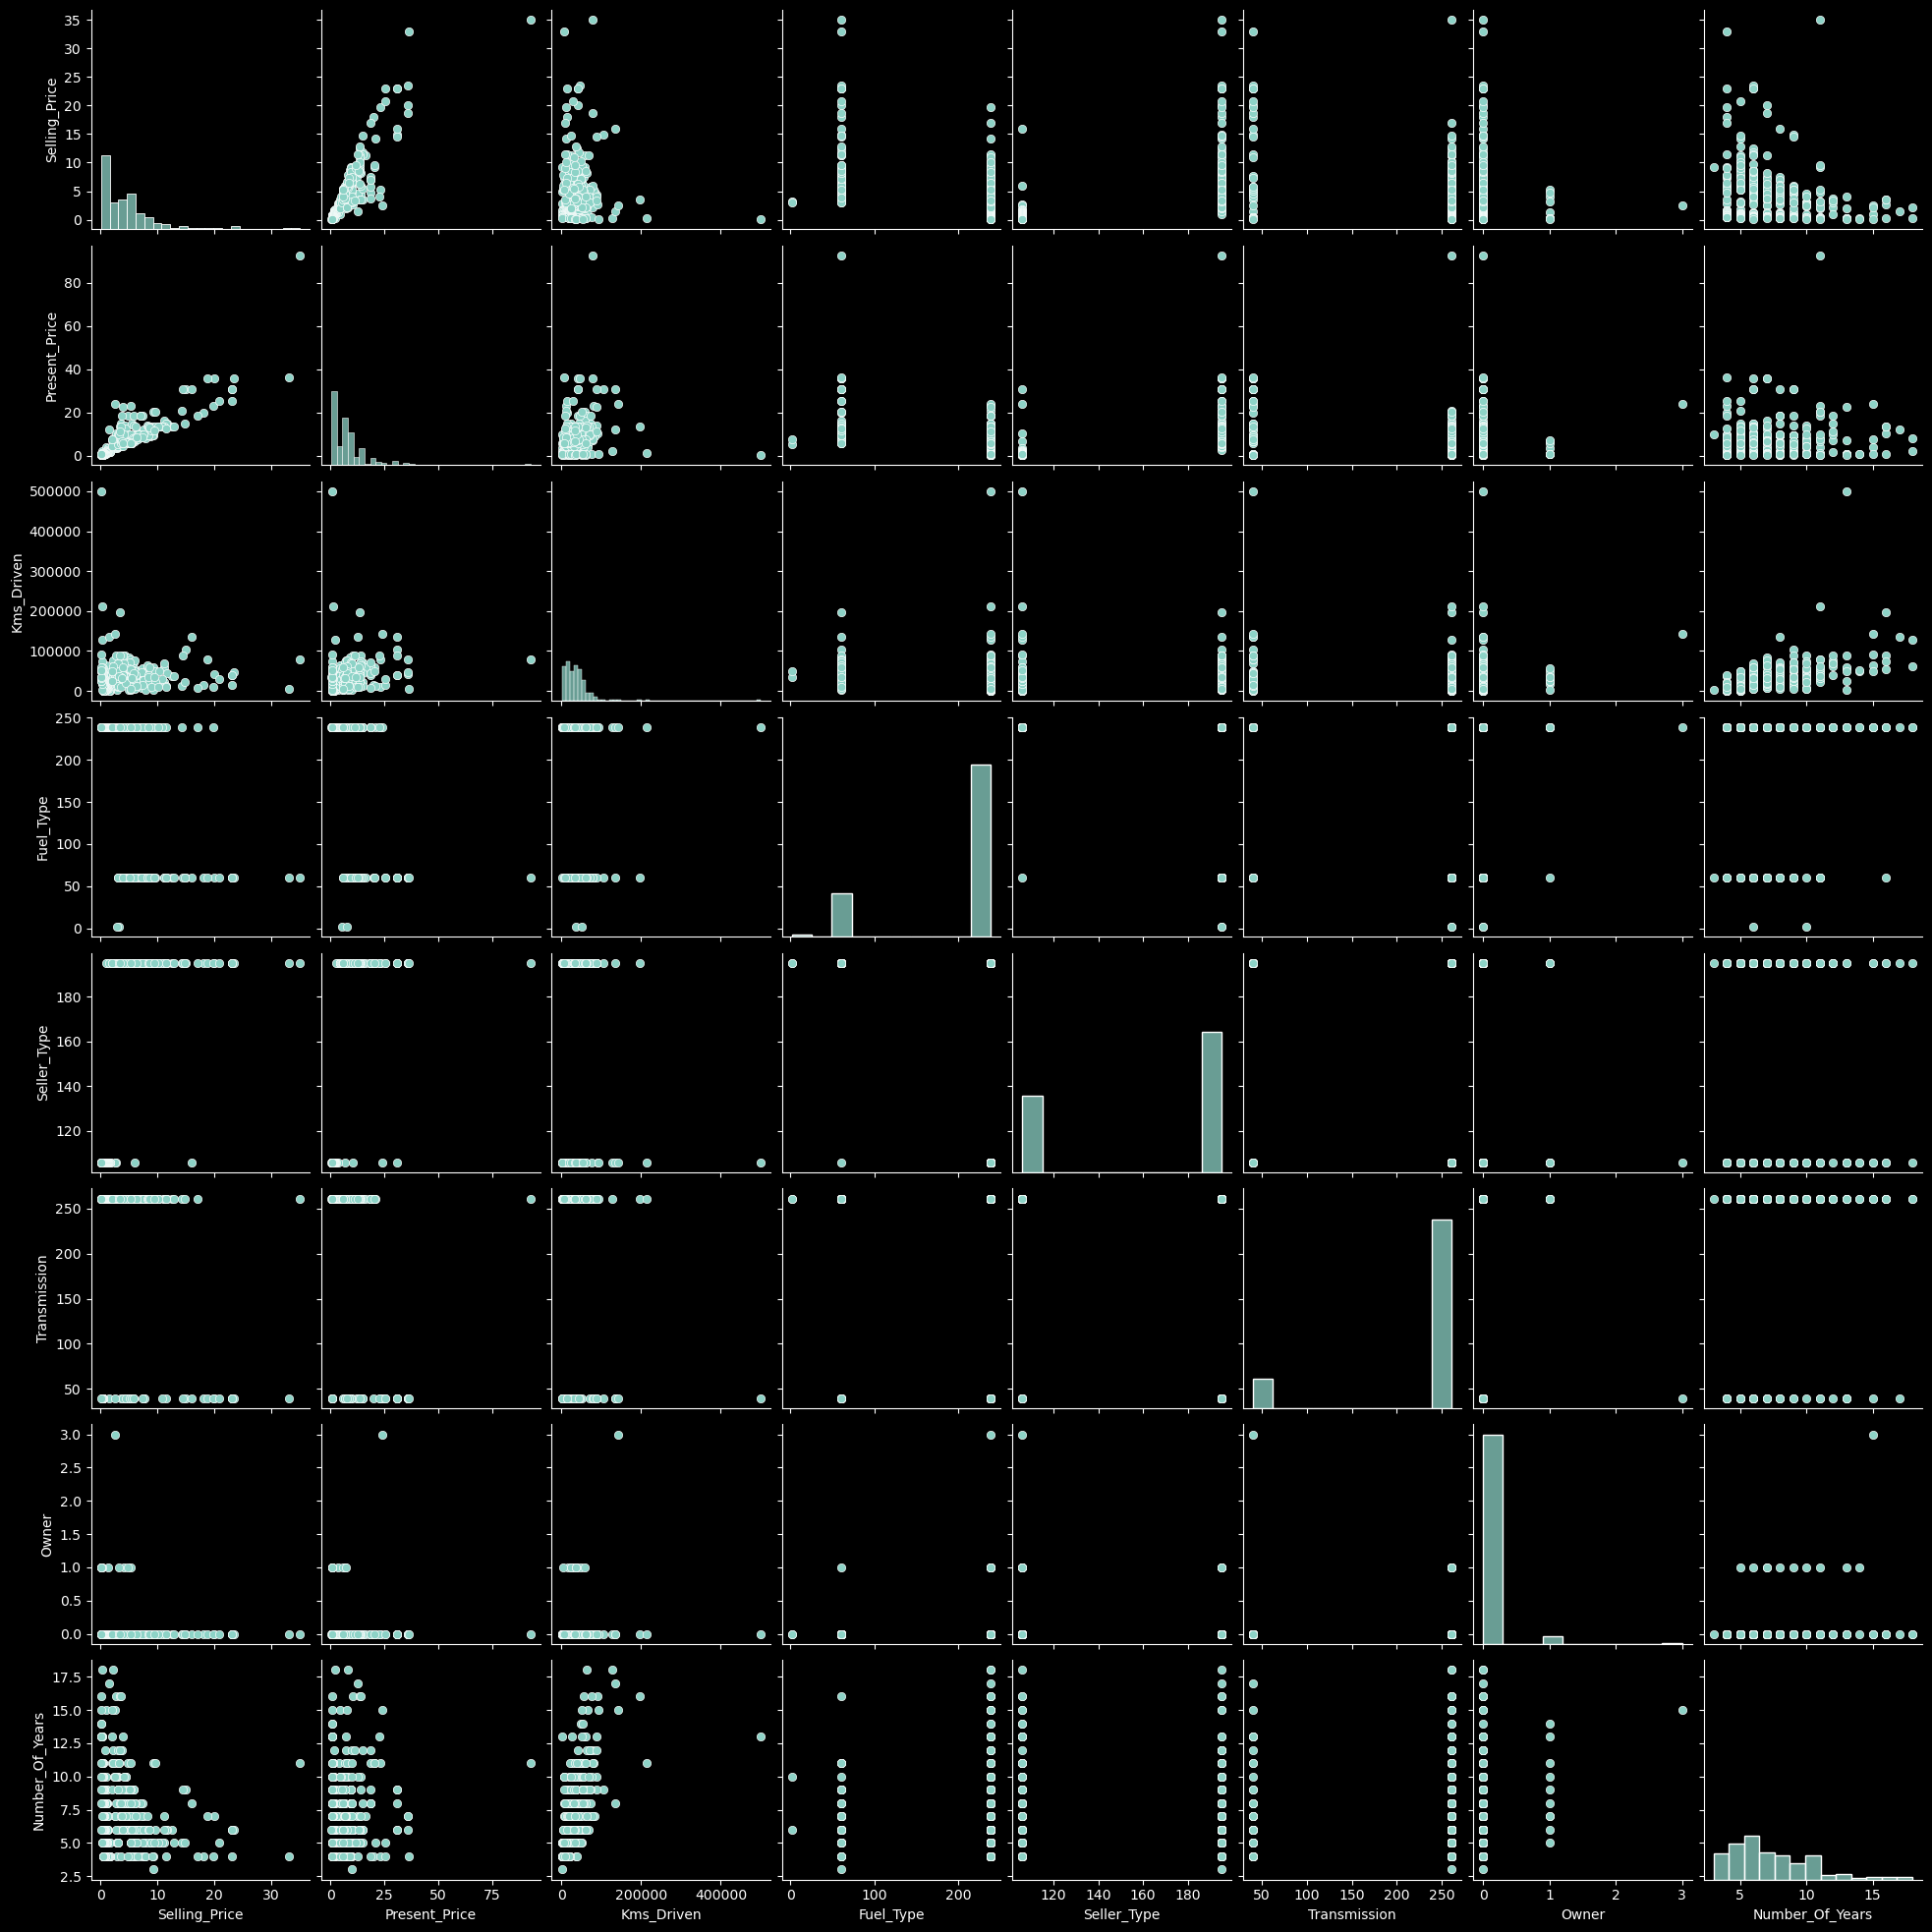

In [20]:
plt.style.use('dark_background')
sns.pairplot(df)

In [21]:
df_corr = df.corr()
index = df_corr.index

<AxesSubplot: >

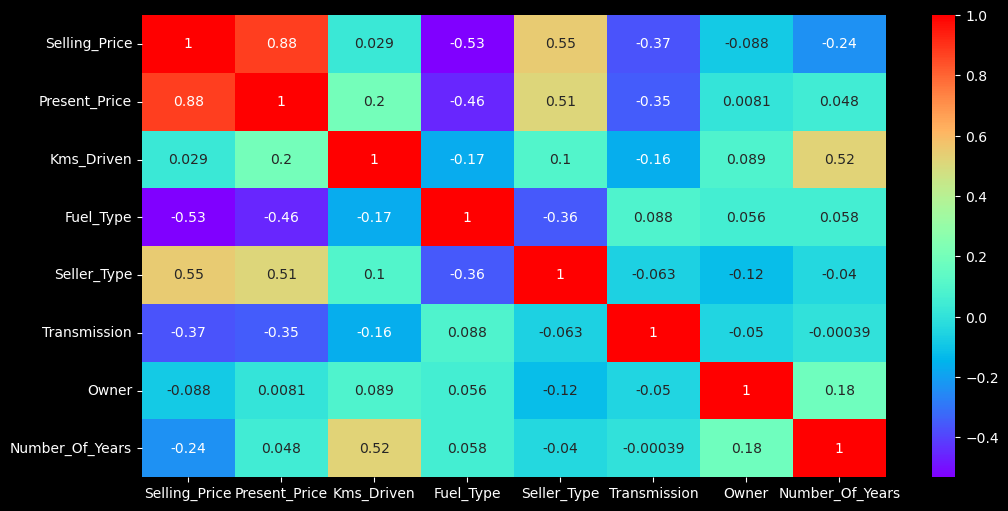

In [22]:
plt.figure(figsize = (12,6))
sns.heatmap(df[index].corr(),annot = True,cmap = 'rainbow')

In [23]:
X = df.drop(['Selling_Price'],axis = 1)
y = df['Selling_Price']

In [24]:
X.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_Of_Years
0,5.59,27000,239,195,261,0,7
1,9.54,43000,60,195,261,0,8
2,9.85,6900,239,195,261,0,4
3,4.15,5200,239,195,261,0,10
4,6.87,42450,60,195,261,0,7


In [25]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [26]:
threshold = .52

def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

correlation(X,threshold)

{'Number_Of_Years'}

In [27]:
model=ExtraTreesRegressor(random_state = 101)
model.fit(X,y)

ExtraTreesRegressor(random_state=101)

In [28]:
model.feature_importances_

array([0.40145835, 0.03987599, 0.14169838, 0.25850563, 0.0789951 ,
       0.00115404, 0.0783125 ])

<AxesSubplot: >

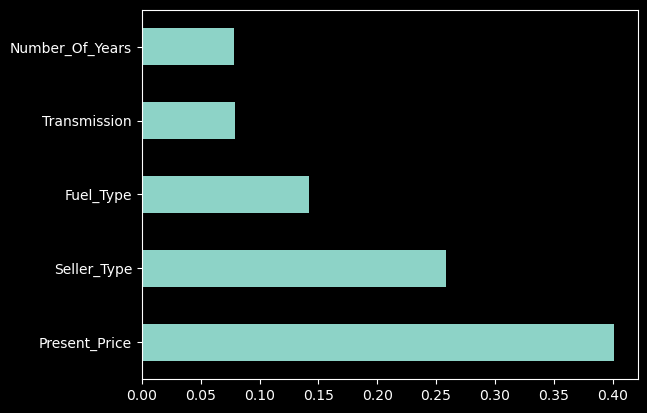

In [29]:
pd.Series(model.feature_importances_, index = X.columns).nlargest(5).plot(kind = 'barh')

In [30]:
rf = RandomForestRegressor()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [32]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [33]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [34]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [35]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/home/blackheart/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.9s


/home/blackheart/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.1s


/home/blackheart/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.0s


/home/blackheart/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.9s


/home/blackheart/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.2s


/home/blackheart/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   3.0s


/home/blackheart/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   3.1s


/home/blackheart/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   3.3s


/home/blackheart/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   3.6s


/home/blackheart/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   3.4s


/home/blackheart/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   6.1s


/home/blackheart/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   5.0s


/home/blackheart/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   5.8s


/home/blackheart/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   5.7s


/home/blackheart/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   4.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   6.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   7.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   6.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   7.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   6.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   6.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   6.7s
[CV] END max_depth=5, max_feat

/home/blackheart/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   4.8s


/home/blackheart/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   5.0s


/home/blackheart/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   4.6s


/home/blackheart/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   5.5s


/home/blackheart/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   4.5s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [36]:
y_pred = rf_random.predict(X_test)

<AxesSubplot: xlabel='Selling_Price', ylabel='Count'>

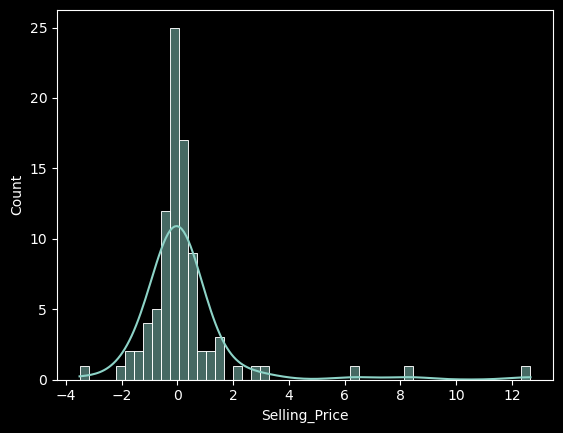

In [37]:
sns.histplot(y_test - y_pred,kde = True)

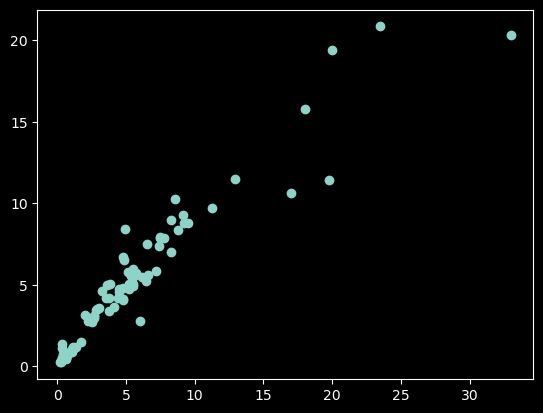

In [38]:
plt.scatter(y_test,y_pred) 

In [39]:
param_grid = {
    'max_depth': [rf_random.best_params_['max_depth']],
    'max_features': [rf_random.best_params_['max_features']],
    'min_samples_leaf': [rf_random.best_params_['min_samples_leaf'], 
                         rf_random.best_params_['min_samples_leaf']+2],
    'min_samples_split': [rf_random.best_params_['min_samples_split'] - 2,
                          rf_random.best_params_['min_samples_split'] - 1,
                          rf_random.best_params_['min_samples_split'], 
                          rf_random.best_params_['min_samples_split'] +1,
                          rf_random.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_random.best_params_['n_estimators'] - 100, 
                     rf_random.best_params_['n_estimators'], 
                     rf_random.best_params_['n_estimators'] + 100]
}

print(param_grid)

{'max_depth': [25], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [900, 1000, 1100]}


In [40]:
rf=RandomForestRegressor()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=0, n_estimators=900; total time=   0.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=0, n_estimators=900; total time=   0.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=0, n_estimators=1000; total time=   0.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=0, n_estimators=1000; total time=   0.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=0, n_estimators=1100; total time=   0.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=0, n_estimators=1100; total time=   0.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=0, n_estimators=1100; total time=   0.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimator

/home/blackheart/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
36 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/home/blackheart/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/blackheart/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/home/blackheart/.local/lib/python3.11/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [25], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [900, 1000, 1100]},
             verbose=2)

In [41]:
grid_search

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [25], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [900, 1000, 1100]},
             verbose=2)

<AxesSubplot: xlabel='Selling_Price', ylabel='Count'>

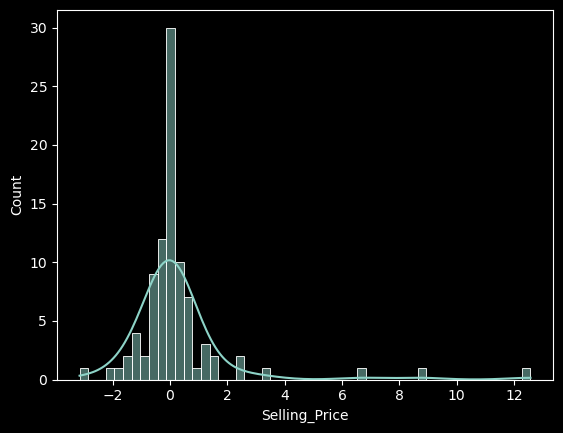

In [42]:
y_pred=grid_search.predict(X_test)
sns.histplot(y_test - y_pred, kde = True)

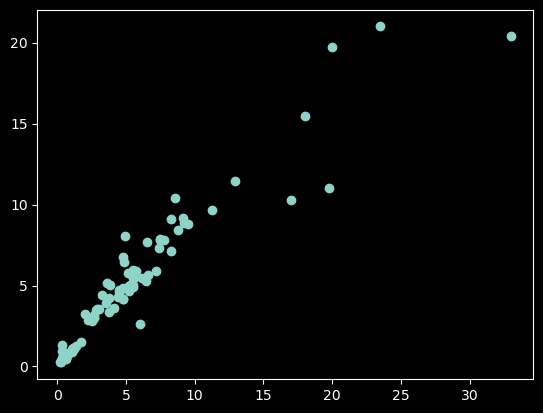

In [43]:
plt.scatter(y_test, y_pred)

In [44]:
params = {'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200])
    }

In [45]:
params

{'max_depth': <hyperopt.pyll.base.Apply at 0x7ff96c022150>,
 'max_features': <hyperopt.pyll.base.Apply at 0x7ff96c9721d0>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x7ff96c076ed0>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x7ff96c96cc10>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x7ff96c0786d0>}

In [51]:
seed=2
def objective(params):
    est = int(params['n_estimators'])
    md = int(params['max_depth'])
    msl = int(params['min_samples_leaf'])
    mss = int(params['min_samples_split'])
    model = RandomForestRegressor(n_estimators=est,max_depth=md,min_samples_leaf=msl,min_samples_split=mss)
    model.fit(X_train,y_train)
    y_pred_hyperopt = model.predict(X_test)
    score = mean_squared_error(y_test,y_pred_hyperopt)
    return score

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',5,20),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2,6)}
    #best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=100,rstate=np.random.RandomState(seed))
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=100,rstate=None)

    return best

trial=Trials()
best=optimize(trial)


100%|██████████| 100/100 [03:05<00:00,  1.86s/trial, best loss: 2.450715096089093]


In [52]:
best

{'max_depth': 11.854078473193585,
 'min_samples_leaf': 2.5314966493329805,
 'min_samples_split': 4.418956157943434,
 'n_estimators': 116.14441622615816}

In [53]:
for t in trial.trials[:2]:
    print (t)

{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 3.5503607734900577, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'max_depth': [0], 'min_samples_leaf': [0], 'min_samples_split': [0], 'n_estimators': [0]}, 'vals': {'max_depth': [18.211388854393533], 'min_samples_leaf': [4.234513980952004], 'min_samples_split': [4.131456074528689], 'n_estimators': [361.33883376994]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2023, 5, 21, 19, 2, 42, 276000), 'refresh_time': datetime.datetime(2023, 5, 21, 19, 2, 46, 621000)}
{'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 3.6125404876333858, 'status': 'ok'}, 'misc': {'tid': 1, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'max_depth': [1], 'min_samples_leaf': [1], 'min_samples_split': [1], 'n_estimators': [1]}, 'vals': {'max_depth': [14.527669385273235], 'min_samples_leaf': [4.690946908985475], 'min_samples_split

In [54]:
TID = [t['tid'] for t in trial.trials]
Loss = [t['result']['loss'] for t in trial.trials]
maxd = [t['misc']['vals']['max_depth'][0] for t in trial.trials]
nest = [t['misc']['vals']['n_estimators'][0] for t in trial.trials]
min_ss = [t['misc']['vals']['min_samples_split'][0] for t in trial.trials]
min_sl = [t['misc']['vals']['min_samples_leaf'][0] for t in trial.trials]

hyperopt_rfr = pd.DataFrame({'tid':TID,'loss':Loss,
                          'max_depth':maxd,'n_estimators':nest,
                          'min_samples_split':min_ss, 'min_samples_leaf':min_sl})

In [55]:
hyperopt_rfr.head()

,tid,loss,max_depth,n_estimators,min_samples_split,min_samples_leaf
0,0,3.550361,18.211389,361.338834,4.131456,4.234514
1,1,3.612540,14.527669,359.832810,2.901323,4.690947
2,2,2.574183,8.988291,274.438527,4.024866,2.664678
3,3,2.641772,8.806369,475.439250,3.458788,1.225125
4,4,2.647062,16.812661,428.237287,3.804674,1.311019


In [58]:
trainedforest = RandomForestRegressor(max_depth = int(best['max_depth']),  
                                       min_samples_leaf = round(best['min_samples_leaf']), 
                                       min_samples_split = round(best['min_samples_split']), 
                                       n_estimators = int(best['n_estimators'])).fit(X_train,y_train)

In [59]:
y_pred_hyperopt = trainedforest.predict(X_test)

<AxesSubplot: xlabel='Selling_Price', ylabel='Count'>

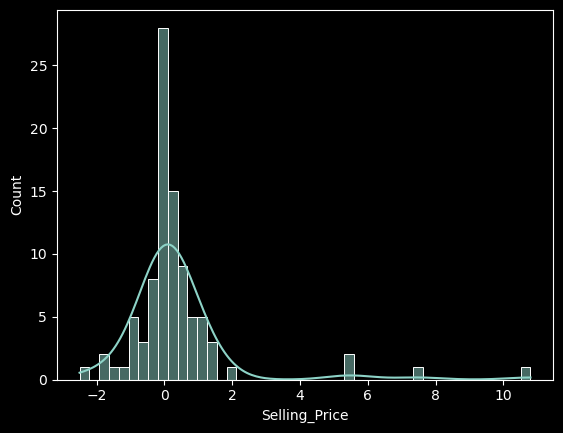

In [60]:
sns.histplot(y_test - y_pred_hyperopt,kde = True)

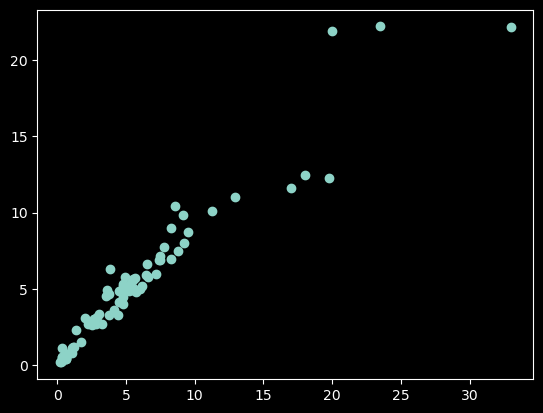

In [61]:
plt.scatter(y_test,y_pred_hyperopt)

In [62]:
print('MAE is:',mean_absolute_error(y_test,y_pred_hyperopt))
print('MSE is:',mean_squared_error(y_test,y_pred_hyperopt))
print('RMSE is:',np.sqrt(mean_squared_error(y_test,y_pred_hyperopt)))

MAE is: 0.800726062117854
MSE is: 3.0501168021047906
RMSE is: 1.7464583596824719


In [63]:
import pickle
file = open('model.pkl','wb')
pickle.dump(trainedforest,file)